# 경제원론 THW05


In [14]:
# 3/8 ~ 4/29 까지의 나스닥, 코덱스, 예탁자산 수익률 데이터 불러오기
import csv

nasdaq = []
kodex = []
deposit = []

rawBenchmark = open("E:/인생/숭실대학교/bm.csv", "r", encoding="UTF-8")
dataBenchmark = csv.reader(rawBenchmark)

rawDeposit = open("E:/인생/숭실대학교/deposit.csv", "r", encoding="UTF-8")
dataDeposit = csv.reader(rawDeposit)

for i in range(0,4):
    next(dataBenchmark)

#나스닥 수익률, 코덱스 수익률 추출
for i in dataBenchmark:
    nasdaq.append(float(i[3]))
    kodex.append(float(i[4]))

#예탁자산 수익률 추출
for i in dataDeposit:
    deposit.append(float(i[4]))


In [15]:
# KODEX200과 예탁자산 회귀분석
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

kodexPredict = []

kodexW = tf.Variable(tf.random.uniform([1], -1, 1))  #임의의 W값 설정
kodexB = tf.Variable(tf.random.uniform([1], -1, 1))  #임의의 b값 설정

X = tf.placeholder(tf.float32)    # 그래프에 맞는 변수 타입을 미리 설정해놓음
Y = tf.placeholder(tf.float32)    

H = kodexW * X + kodexB   # H(x) = Wx + b

cost = tf.reduce_mean(tf.square(H - Y)) # 비용(오차) 공식, 오차 = square(예측값 - 실제값)의 평균

a = tf.Variable(0.3)   # 학습률 설정
optimizer = tf.train.GradientDescentOptimizer(a)  #경사하강 옵티마이저 설정
train = optimizer.minimize(cost)    #비용을 최소화

init = tf.global_variables_initializer()  #초기화

sess = tf.Session()   #세션 생성 및 실행
sess.run(init)  

#500 학습에 한번 진행상황을 출력
for i in range(150001):
    sess.run(train, feed_dict={X: kodex, Y: deposit})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict={X: kodex, Y: deposit}), sess.run(kodexW), sess.run(kodexB))

for i in kodex:
    kodexPredict.append(sess.run(H, feed_dict={X: [i]}))

0 0.033384074 [-0.06754749] [0.18215746]
500 2.6406065e-05 [-0.05659086] [-0.00047968]
1000 2.5651188e-05 [-0.04594999] [-0.00047823]
1500 2.4935953e-05 [-0.03559229] [-0.00047682]
2000 2.4258277e-05 [-0.02551024] [-0.00047545]
2500 2.3616187e-05 [-0.01569648] [-0.00047412]
3000 2.3007822e-05 [-0.00614389] [-0.00047282]
3500 2.2431404e-05 [0.00315449] [-0.00047155]
4000 2.1885257e-05 [0.01220542] [-0.00047032]
4500 2.1367789e-05 [0.0210155] [-0.00046912]
5000 2.08775e-05 [0.02959109] [-0.00046795]
5500 2.0412957e-05 [0.0379385] [-0.00046682]
6000 1.9972807e-05 [0.04606377] [-0.00046571]
6500 1.9555777e-05 [0.05397281] [-0.00046463]
7000 1.9160643e-05 [0.06167137] [-0.00046359]
7500 1.8786259e-05 [0.06916507] [-0.00046257]
8000 1.8431538e-05 [0.07645935] [-0.00046157]
8500 1.8095447e-05 [0.08355951] [-0.00046061]
9000 1.7777e-05 [0.09047076] [-0.00045967]
9500 1.747528e-05 [0.09719805] [-0.00045875]
10000 1.7189406e-05 [0.1037463] [-0.00045786]
10500 1.6918546e-05 [0.11012029] [-0.00045

89000 1.2032674e-05 [0.33988023] [-0.00042573]
89500 1.203262e-05 [0.33996964] [-0.00042571]
90000 1.20325685e-05 [0.34005904] [-0.0004257]
90500 1.2032516e-05 [0.34014845] [-0.00042569]
91000 1.20324685e-05 [0.34023586] [-0.00042568]
91500 1.20324285e-05 [0.34031036] [-0.00042567]
92000 1.2032388e-05 [0.34038487] [-0.00042566]
92500 1.2032351e-05 [0.34045938] [-0.00042565]
93000 1.2032315e-05 [0.34053388] [-0.00042564]
93500 1.2032278e-05 [0.3406084] [-0.00042563]
94000 1.2032243e-05 [0.3406829] [-0.00042562]
94500 1.203221e-05 [0.3407574] [-0.00042561]
95000 1.203218e-05 [0.34082118] [-0.0004256]
95500 1.2032155e-05 [0.34088078] [-0.00042559]
96000 1.2032129e-05 [0.3409404] [-0.00042558]
96500 1.2032104e-05 [0.341] [-0.00042557]
97000 1.203208e-05 [0.3410596] [-0.00042557]
97500 1.2032058e-05 [0.3411192] [-0.00042556]
98000 1.2032036e-05 [0.3411788] [-0.00042555]
98500 1.2032013e-05 [0.3412384] [-0.00042554]
99000 1.2031992e-05 [0.341298] [-0.00042553]
99500 1.2031973e-05 [0.34135088

In [16]:
# KODEX200과 예탁자산 회귀분석
nasdaqPredict = []

nasdaqW = tf.Variable(tf.random.uniform([1], -1, 1))  #임의의 W값 설정
nasdaqB = tf.Variable(tf.random.uniform([1], -1, 1))  #임의의 b값 설정

X = tf.placeholder(tf.float32)    # 그래프에 맞는 변수 타입을 미리 설정해놓음
Y = tf.placeholder(tf.float32)    

H = nasdaqW * X + nasdaqB   # H(x) = Wx + b

cost = tf.reduce_mean(tf.square(H - Y)) # 비용(오차) 공식, 오차 = square(예측값 - 실제값)의 평균

a = tf.Variable(0.3)   # 학습률 설정
optimizer = tf.train.GradientDescentOptimizer(a)  #경사하강 옵티마이저 설정
train = optimizer.minimize(cost)    #비용을 최소화

init = tf.global_variables_initializer()  #초기화

sess = tf.Session()   #세션 생성 및 실행
sess.run(init)  

#500 학습에 한번 진행상황을 출력
for i in range(150001):
    sess.run(train, feed_dict={X: nasdaq, Y: deposit})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict={X: nasdaq, Y: deposit}), sess.run(nasdaqW), sess.run(nasdaqB))

for i in nasdaq:
    nasdaqPredict.append(sess.run(H, feed_dict={X: [i]}))

0 0.07145977 [-0.9482811] [0.26650348]
500 0.0002839381 [-0.8654751] [-0.0002225]
1000 0.0002448454 [-0.78891605] [-0.00024457]
1500 0.00021149046 [-0.7181982] [-0.00026495]
2000 0.00018303104 [-0.6528757] [-0.00028378]
2500 0.00015874862 [-0.59253687] [-0.00030117]
3000 0.0001380304 [-0.53680223] [-0.00031724]
3500 0.0001203531 [-0.48532015] [-0.00033208]
4000 0.00010527031 [-0.43776584] [-0.00034579]
4500 9.2401315e-05 [-0.39383993] [-0.00035845]
5000 8.142113e-05 [-0.35326543] [-0.00037014]
5500 7.205252e-05 [-0.3157865] [-0.00038094]
6000 6.405895e-05 [-0.2811671] [-0.00039092]
6500 5.7238674e-05 [-0.24918923] [-0.00040014]
7000 5.141942e-05 [-0.21965115] [-0.00040865]
7500 4.645428e-05 [-0.19236672] [-0.00041652]
8000 4.2217882e-05 [-0.16716401] [-0.00042378]
8500 3.8603303e-05 [-0.14388438] [-0.00043049]
9000 3.551922e-05 [-0.12238075] [-0.00043669]
9500 3.28878e-05 [-0.10251776] [-0.00044242]
10000 3.0642605e-05 [-0.08417032] [-0.0004477]
10500 2.8726945e-05 [-0.06722272] [-0.00

88500 1.7590772e-05 [0.13790846] [-0.00051172]
89000 1.7590772e-05 [0.13790846] [-0.00051172]
89500 1.7590772e-05 [0.13790846] [-0.00051172]
90000 1.7590772e-05 [0.13790846] [-0.00051172]
90500 1.7590772e-05 [0.13790846] [-0.00051172]
91000 1.7590772e-05 [0.13790846] [-0.00051172]
91500 1.7590772e-05 [0.13790846] [-0.00051172]
92000 1.7590772e-05 [0.13790846] [-0.00051172]
92500 1.7590772e-05 [0.13790846] [-0.00051172]
93000 1.7590772e-05 [0.13790846] [-0.00051172]
93500 1.7590772e-05 [0.13790846] [-0.00051172]
94000 1.7590772e-05 [0.13790846] [-0.00051172]
94500 1.7590772e-05 [0.13790846] [-0.00051172]
95000 1.7590772e-05 [0.13790846] [-0.00051172]
95500 1.7590772e-05 [0.13790846] [-0.00051172]
96000 1.7590772e-05 [0.13790846] [-0.00051172]
96500 1.7590772e-05 [0.13790846] [-0.00051172]
97000 1.7590772e-05 [0.13790846] [-0.00051172]
97500 1.7590772e-05 [0.13790846] [-0.00051172]
98000 1.7590772e-05 [0.13790846] [-0.00051172]
98500 1.7590772e-05 [0.13790846] [-0.00051172]
99000 1.75907

In [7]:
import numpy as np
from sklearn.metrics import r2_score

kodexFitLine = np.polyfit(kodex, deposit, 1) # input 의미 : x축 데이터, y축 데이터, 1차원
predict = np.poly1d(kodexFitLine)
kodexR2np = r2_score(deposit, predict(kodex))

nasdaqFitLine = np.polyfit(nasdaq, deposit, 1)
predict = np.poly1d(nasdaqFitLine)
nasdaqR2np = r2_score(deposit, predict(nasdaq))

print(kodexFitLine)
print(kodexR2np)
print(nasdaqFitLine)
print(nasdaqR2np)

[ 0.34326433 -0.00042527]
0.46821963045123527
[ 0.1379554  -0.00051173]
0.22251458490445553


In [18]:
#R2 계산

kodexR2 = r2_score(kodex,kodexPredict)
nasdaqR2 = r2_score(nasdaq,nasdaqPredict)

print(kodexR2)
print(nasdaqR2)

0.5670804002211589
0.2546138949606064


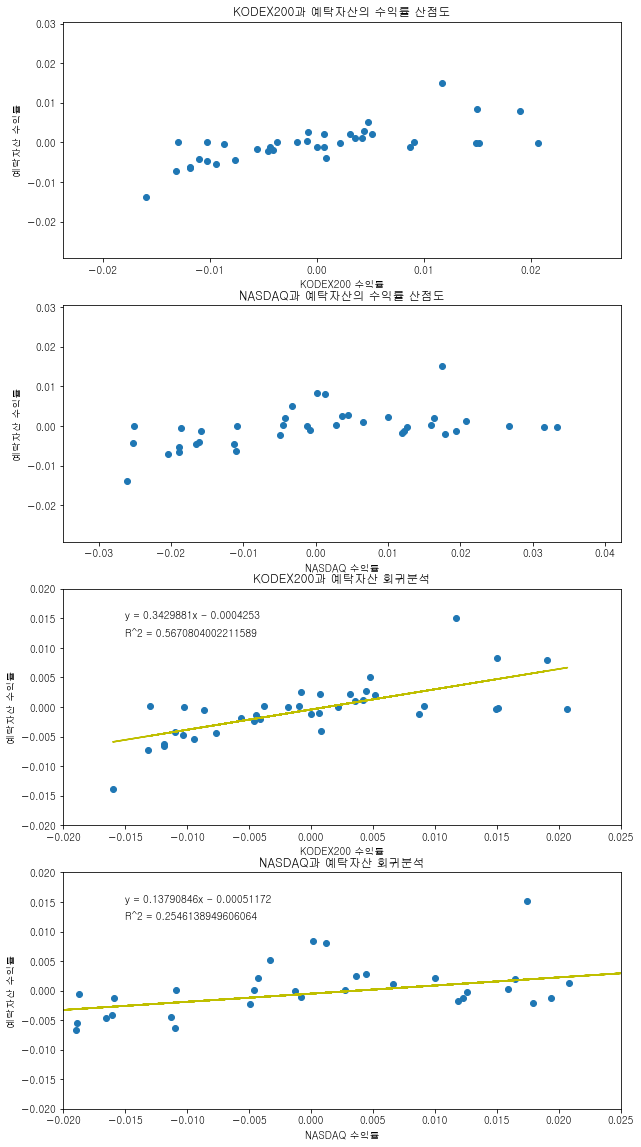

In [19]:
# 그래프 그리기
import matplotlib.pyplot as plt
import numpy
plt.rc("font", family="Gulim")
plt.figure(figsize=(10,20))

# x1, y 산점도
plt.subplot(4,1,1)

plt.title("KODEX200과 예탁자산의 수익률 산점도")
plt.scatter(kodex, deposit)
plt.xlabel('KODEX200 수익률')
plt.ylabel('예탁자산 수익률')

# x2, y 산점도
plt.subplot(4,1,2)
plt.title("NASDAQ과 예탁자산의 수익률 산점도")
plt.scatter(nasdaq, deposit)
plt.xlabel('NASDAQ 수익률')
plt.ylabel('예탁자산 수익률')

# x1, y 회귀직선
plt.subplot(4,1,3)
plt.title("KODEX200과 예탁자산 회귀분석")
plt.xlim(-0.02,0.025)
plt.ylim(-0.02,0.02)
plt.scatter(kodex, deposit)
plt.plot(kodex, kodexPredict, color="y")
plt.xlabel('KODEX200 수익률')
plt.ylabel('예탁자산 수익률')
plt.text(-0.015, 0.015, "y = 0.3429881x - 0.0004253")
plt.text(-0.015, 0.012, "R^2 = 0.5670804002211589")

# x2, y 회귀직선
plt.subplot(4,1,4)
plt.title("NASDAQ과 예탁자산 회귀분석")
plt.xlim(-0.02,0.025)
plt.ylim(-0.02,0.02)
plt.scatter(nasdaq, deposit)
plt.plot(nasdaq, nasdaqPredict, color="y")
plt.xlabel('NASDAQ 수익률')
plt.ylabel('예탁자산 수익률')
plt.text(-0.015, 0.015, "y = 0.13790846x - 0.00051172 ")
plt.text(-0.015, 0.012, "R^2 = 0.2546138949606064")

plt.show()